In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
from collections import defaultdict
import heapq
from timeit import default_timer as timer
%matplotlib inline

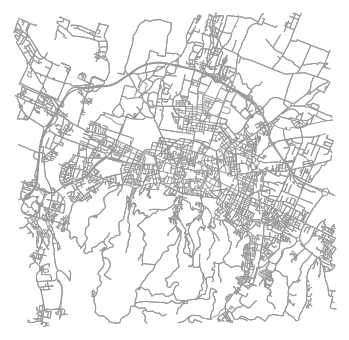

In [2]:
G = ox.load_graphml('network_proj.graphml')
fig, ax = ox.plot_graph(G, node_color = 'w')

In [3]:
nodes, edges = ox.graph_to_gdfs(G)

In [4]:
lista_nodi = nodes['osmid'].tolist()
tail = edges['u'].tolist()
head = edges['v'].tolist()
weight = edges['length'].tolist()



my_edges1 = []
my_edges2 = []


for i in range(len(tail)):
    my_edges1.append([tail[i], head[i], weight[i]])
    my_edges2.append([head[i], tail[i], weight[i]])

graph_1 = defaultdict(list)
for t, h, w in my_edges1:
    graph_1[t].append((h, w))
    
graph_2 = defaultdict(list)
for t, h, w in my_edges2:
    graph_2[t].append((h, w))



In [5]:
#Uncomment lines below if you want Bidirectional_Dijkstra_2()

def Bidirectional_Dijkstra(graph_1, graph_2, source, target):
    
    distance_1 = {}
    distance_2 = {}
    padre_1 = {}
    padre_2 = {}
    visited_1 = []
    visited_2 = []

    for i in lista_nodi:
        distance_1[i] = 99999
        padre_1[i] = None
        distance_2[i] = 99999
        padre_2[i] = None

    distance_1[source] = 0
    distance_2[target] = 0
    q_1 = [(0, source)]
    q_2 = [(0, target)]
    mu = 9999999
    curr_dist_1 = 0
    curr_dist_2 = 0
    while (curr_dist_1 + curr_dist_2 < mu):
        #if len(q_1) < len(q_2):
            curr_dist_1, curr_node_1 = min_heap(q_1, visited_1)
            visited_1.append(curr_node_1)
            for neighbor, cost in graph_1[curr_node_1]:
                if curr_dist_1 + cost < distance_1[neighbor]:
                    distance_1[neighbor]= curr_dist_1 + cost
                    padre_1[neighbor]= curr_node_1
                    heapq.heappush(q_1, (distance_1[neighbor], neighbor))
                    if neighbor in visited_2 and curr_dist_1 + cost + distance_2[neighbor] < mu:
                        mu = curr_dist_1 + cost + distance_2[neighbor]
                        node_in_path = curr_node_1
                        neigh_in_path = neighbor
             
        #else:
            curr_dist_2, curr_node_2 = min_heap(q_2, visited_2)
            visited_2.append(curr_node_2)

            for neighbor, cost in graph_2[curr_node_2]:
                if curr_dist_2 + cost < distance_2[neighbor]:
                    distance_2[neighbor]= curr_dist_2 + cost
                    padre_2[neighbor]= curr_node_2
                    heapq.heappush(q_2, (distance_2[neighbor], neighbor))
                    if neighbor in visited_1 and curr_dist_2 + cost + distance_1[neighbor] < mu:
                        mu = curr_dist_2 + cost + distance_1[neighbor]
                        node_in_path = neighbor
                        neigh_in_path = curr_node_2
    
    rev_path = [node_in_path]
    k = 0
    while source not in rev_path:
        rev_path.append(padre_1[rev_path[k]])
        k = k + 1
    path_1 = rev_path[::-1]
    path_2 = [neigh_in_path]
    j = 0
    while target not in path_2:
        path_2.append(padre_2[path_2[j]])
        j = j + 1
    path = path_1 + path_2
    
    print("Amount of visited nodes: " + str(len(visited_1+visited_2)))
    print("Cost: " + str(mu))
    print("Path: " + str(path))
    fig, ax = ox.plot_graph_route(G, path, node_color='w')

    nc = ['b' if (node in visited_1) else 'r' if (node in visited_2) else 'w' for node in G.nodes()]
    test = [100 if (node == source or node == target) else 4 if (node in visited_1 or node in visited_2) else 0 for node in G.nodes()]
    fig, ax = ox.plot_graph(G, node_size=test, node_color=nc, edge_linewidth=0.8,node_zorder=3,save = True , file_format = 'png', filename='BD_test')


In [6]:
def min_heap(heap, visited):
    bool = True
    while bool:
        curr_dist, curr_node = heapq.heappop(heap)
        if curr_node not in visited:
            bool = False
    return curr_dist, curr_node

Amount of visited nodes: 1088
Cost: 5617.027
Path: [400885366, 251885681, 251891683, 250734925, 250763454, 1219012774, 1219012770, 402601423, 250715915, 250762010, 3292011304, 3292011306, 250761907, 250761922, 250761957, 250761995, 250761934, 2146910608, 250761923, 2146913964, 250762236, 250762498, 4494421052, 566396532, 1667235080, 295457559, 1818378749, 1818378641, 295458998, 295243515, 250762502, 262557689, 262557673, 251909607, 251909608, 251909609, 251909610, 251909616, 251909621, 791746517, 252654961, 2957327372, 791746315, 255330402, 496063942, 298376301, 1689590392, 252654956, 2973847300, 2973847320, 2973847293, 2973847296, 2973847325, 2973847324, 2973847332, 2973851336, 2101631639, 2101631643]


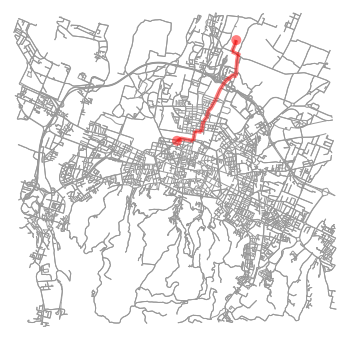

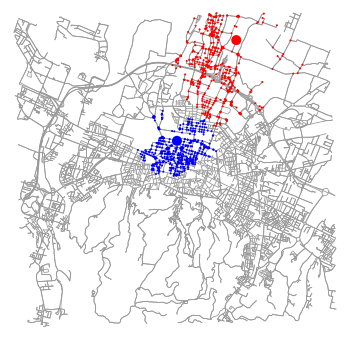

In [7]:
#start = timer()
Bidirectional_Dijkstra(graph_1, graph_2, 400885366, 2101631643)
#end = timer()
#print(end - start)